In [1]:
# Zilin Chen
# 6/4/2022
# This project is to build simple ML models on San Francisco Housing Price data.
# The goal is to explore the data, do some featuring engineering, 
#     and build simple ML models like linear regression to train the data

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
np.random.seed(42)
%matplotlib inline

### 1.The first part is to take a general view of the data

In [3]:
df = pd.read_csv('Project1_Sales.csv')
# Get a look at all the columns
pd.set_option('display.max_columns', None) 
df.head(10)

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.509650,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,1050,1,SF District 1,1050,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.509290,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.509290,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.509240,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.509190,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3
5,-122.509190,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121-2410",San Francisco,CA,618,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,5/17/2018,13,2749000,6/21/2018,3310000,8,4.0,4,0.0909,3959,1951,3
6,-122.509186,37.761005,23.69,"1362 La Playa St, San Francisco, CA 94122-1019",San Francisco,CA,1362,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,2/18/2009,76,600000,5/19/2009,530000,0,1.0,3,NaN,0,1947,2
7,-122.509090,37.759580,23.45,"1434 La Playa St, San Francisco, CA 94122",San Francisco,CA,1434,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,7/6/2018,131,1595000,11/28/2018,1304000,0,2.0,3,0.0606,2639,1900,1
8,-122.509080,37.759480,23.57,"1440 La Playa St, San Francisco, CA 94122",San Francisco,CA,1440,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,10/9/2015,24,998000,12/16/2015,1303000,5,2.0,3,0.0688,2996,1900,1
9,-122.509056,37.758010,23.01,"1516 Great Highway, San Francisco, CA 94122",San Francisco,CA,1516,Great Highway,NaN,94122,2030,2,SF District 2,2030,2 - Outer Sunset,4/30/2018,15,1298000,5/23/2018,1830000,7,3.0,4,0.0705,3072,1948,1


In [4]:
# There are 27 columns in total
print(len(df.columns))
df.columns

27


Index(['longitude', 'latitude', 'elevation', 'full_address', 'city', 'state',
       'street_no', 'street_name', 'street_suffix', 'zip', 'area',
       'district_no', 'district_desc', 'subdist_no', 'subdist_desc',
       'on_market_date', 'cdom', 'orig_list_price', 'sale_date', 'sale_price',
       'rooms', 'baths', 'beds', 'lot_acres', 'lot_sf', 'year_built',
       'num_parking'],
      dtype='object')

In [5]:
# first look at the metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23711 entries, 0 to 23710
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitude        23242 non-null  float64
 1   latitude         23242 non-null  float64
 2   elevation        23242 non-null  float64
 3   full_address     23711 non-null  object 
 4   city             23711 non-null  object 
 5   state            23711 non-null  object 
 6   street_no        23711 non-null  int64  
 7   street_name      23711 non-null  object 
 8   street_suffix    22098 non-null  object 
 9   zip              23711 non-null  int64  
 10  area             23711 non-null  int64  
 11  district_no      23711 non-null  int64  
 12  district_desc    23711 non-null  object 
 13  subdist_no       23711 non-null  int64  
 14  subdist_desc     23711 non-null  object 
 15  on_market_date   23711 non-null  object 
 16  cdom             23711 non-null  int64  
 17  orig_list_pr

In [6]:
# only one city, SF
df['city'].unique()

array(['San Francisco'], dtype=object)

In [7]:
# only one state, CA
df['state'].unique()

array(['CA'], dtype=object)

In [8]:
# 10 district numbers
df['district_no'].unique()

array([ 1,  2,  3,  4, 10,  7,  5,  6,  9,  8])

In [9]:
df['subdist_no'].unique()

array([ 1050,  2030,  2020,  3010,  2050,  2040,  3030,  1060,  1010,
        1040,  3060,  3040,  2060,  2070,  3050,  2010,  4160,  4050,
        3020,  3070,  1020,  4010,  4070,  4030, 10040,  4120,  4110,
        7030,  4090,  3090,  3080,  4040,  4140,  4100,  4080,  4130,
        1070,  1030,  5050,  4060,  4150, 10020,  5020,  5080,  6060,
        5040,  7010,  5060,  7020,  7040,  4020,  5070,  5010,  6030,
        6010, 10080,  5100,  5030, 10030,  6040,  6050,  5090,  6020,
        9010, 10010,  5110, 10050,  8050, 10060,  8060,  9020,  8030,
        8010,  9050,  8090,  8040,  8070,  9040, 10070,  9080, 10120,
       10100,  9060, 10110,  9070, 10090])

In [10]:
df.describe()

,longitude,latitude,elevation,street_no,zip,area,district_no,subdist_no,cdom,orig_list_price,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
count,23242.000000,23242.000000,23242.000000,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000,2.371100e+04,2.371100e+04,23711.000000,23711.000000,23711.000000,10332.000000,23711.000000,23711.000000,23711.000000
mean,-122.447325,37.745273,249.562446,1001.928936,94120.321412,5581.341993,5.535321,5581.341993,43.288685,1.791031e+06,1.371454e+06,4.463203,2.079636,3.006664,0.858479,1242.486061,1817.956392,1.497533
std,0.031239,0.022504,152.766784,1088.454442,43.495644,3246.142173,3.251098,3246.142173,55.594501,1.836568e+07,1.298631e+06,3.375162,1.088199,1.084513,47.421977,1599.570446,457.579238,0.775076
min,-122.509650,37.707893,8.370000,1.000000,91107.000000,1010.000000,1.000000,1010.000000,0.000000,1.000000e+00,1.050000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.470070,37.729390,138.140000,164.000000,94112.000000,2070.000000,2.000000,2070.000000,13.000000,6.811110e+05,7.030000e+05,0.000000,1.000000,2.000000,0.054500,0.000000,1911.000000,1.000000
50%,-122.445050,37.741936,227.700000,549.000000,94118.000000,5030.000000,5.000000,5030.000000,27.000000,8.990000e+05,1.008000e+06,5.000000,2.000000,3.000000,0.060800,0.000000,1927.000000,1.000000
75%,-122.425723,37.757972,329.685000,1619.000000,94127.000000,9020.000000,9.000000,9020.000000,51.000000,1.450000e+06,1.588000e+06,7.000000,2.500000,4.000000,0.069200,2500.000000,1946.000000,2.000000
max,-122.370895,37.806440,825.500000,8332.000000,97124.000000,10120.000000,10.000000,10120.000000,2054.000000,9.950000e+08,3.200000e+07,30.000000,14.000000,40.000000,3283.000000,28788.000000,2018.000000,7.000000


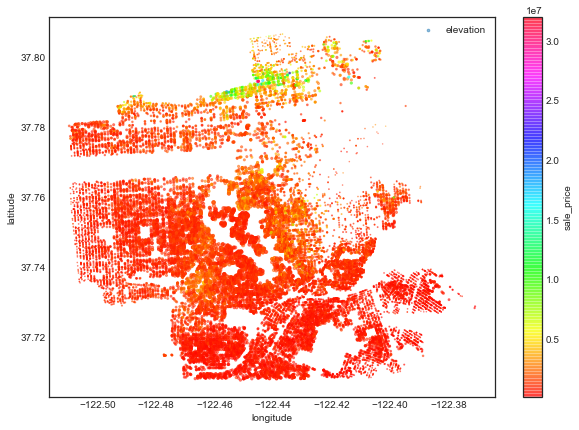

In [11]:
# take a look at all data and price distribution
# alpha -> transparency of color, s -> point size, c -> columns for colormap
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=df["elevation"]/60, label="elevation", figsize=(10,7),
    c="sale_price", cmap=plt.get_cmap("hsv"), colorbar=True,
    sharex=False)
plt.legend()

In [12]:
# test for data within some range
# few blueish points
df[df.apply(lambda x: x['sale_price'] > 2e+07 and x['sale_price'] < 2.5e+07, axis=1)]

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
15082,-122.4343,37.795334,184.25,"2250 Vallejo, San Francisco, CA 94123-4764",San Francisco,CA,2250,Vallejo,NaN,94123,7020,7,SF District 7,7020,7 - Pacific Heights,3/9/2016,213,28000000,10/14/2016,21800000,0,7.0,7,0.1421,6188,1902,2


### Further explore data

In [13]:
#Drop unnecessary and redundant columns
df.columns

Index(['longitude', 'latitude', 'elevation', 'full_address', 'city', 'state',
       'street_no', 'street_name', 'street_suffix', 'zip', 'area',
       'district_no', 'district_desc', 'subdist_no', 'subdist_desc',
       'on_market_date', 'cdom', 'orig_list_price', 'sale_date', 'sale_price',
       'rooms', 'baths', 'beds', 'lot_acres', 'lot_sf', 'year_built',
       'num_parking'],
      dtype='object')

In [14]:
False in (df['area'] == df['subdist_no']).values

False

In [15]:
df.drop(['full_address', 'city', 'state', 'street_no', 'street_name', 'street_suffix','district_no', 'district_desc', 'area', 'subdist_no'], \
           axis=1, inplace=True)

In [16]:
df.head()

,longitude,latitude,elevation,zip,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,94121,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,94122,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,94122,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,94121,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,94121,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


In [17]:
df['subdist_desc'].unique()

array(['1 - Outer Richmond', '2 - Outer Sunset', '2 - Outer Parkside',
       '3 - Lake Shore', '2 - Central Sunset', '2 - Parkside',
       '3 - Pine Lake Park', '1 - Sea Cliff', '1 - Central Richmond',
       '1 - Lake Street', '3 - Merced Manor', '3 - Stonestown',
       '2 - Inner Sunset', '2 - Inner Parkside', '3 - Lakeside',
       '2 - Golden Gate Heights', '4 - West Portal',
       '4 - Ingleside Terrace', '3 - Merced Heights',
       '3 - Ingleside Heights', '1 - Inner Richmond',
       '4 - Balboa Terrace', '4 - St. Francis Wood', '4 - Forest Hill',
       '10 - Outer Mission', '4 - Mount Davidson Manor',
       '4 - Monterey Heights', '7 - Presidio Heights',
       '4 - Forest Hill Extensio', '3 - Oceanview', '3 - Ingleside',
       '4 - Forest Knolls', '4 - Westwood Park', '4 - Sherwood Forest',
       '4 - Miraloma Park', '4 - Westwood Highlands', '1 - Lone Mountain',
       '1 - Jordan Park/Laurel H', '5 - Cole Valley/Parnassu',
       '4 - Midtown Terrace', '4 - Sunnysid

In [18]:
df.columns

Index(['longitude', 'latitude', 'elevation', 'zip', 'subdist_desc',
       'on_market_date', 'cdom', 'orig_list_price', 'sale_date', 'sale_price',
       'rooms', 'baths', 'beds', 'lot_acres', 'lot_sf', 'year_built',
       'num_parking'],
      dtype='object')

In [19]:
df.drop(['zip', 'orig_list_price'], axis=1, inplace=True)

In [20]:
df.head(10)

,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.509650,37.780280,200.83,1 - Outer Richmond,3/14/2013,4,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.509290,37.762608,23.21,2 - Outer Sunset,12/3/2015,144,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.509290,37.762608,23.21,2 - Outer Sunset,5/18/2017,36,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.509240,37.777330,189.11,1 - Outer Richmond,6/27/2010,42,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.509190,37.776695,175.89,1 - Outer Richmond,6/7/2012,24,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3
5,-122.509190,37.776695,175.89,1 - Outer Richmond,5/17/2018,13,6/21/2018,3310000,8,4.0,4,0.0909,3959,1951,3
6,-122.509186,37.761005,23.69,2 - Outer Sunset,2/18/2009,76,5/19/2009,530000,0,1.0,3,NaN,0,1947,2
7,-122.509090,37.759580,23.45,2 - Outer Sunset,7/6/2018,131,11/28/2018,1304000,0,2.0,3,0.0606,2639,1900,1
8,-122.509080,37.759480,23.57,2 - Outer Sunset,10/9/2015,24,12/16/2015,1303000,5,2.0,3,0.0688,2996,1900,1
9,-122.509056,37.758010,23.01,2 - Outer Sunset,4/30/2018,15,5/23/2018,1830000,7,3.0,4,0.0705,3072,1948,1


In [21]:
pd.set_option('display.max_rows',10)
df

,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,1 - Outer Richmond,3/14/2013,4,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,2 - Outer Sunset,12/3/2015,144,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,5/18/2017,36,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,1 - Outer Richmond,6/27/2010,42,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,1 - Outer Richmond,6/7/2012,24,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23706,NaN,NaN,NaN,1 - Lone Mountain,2/10/2014,19,3/31/2014,1300000,6,1.5,3,NaN,0,1905,1
23707,NaN,NaN,NaN,10 - Bayview,10/30/2011,10,12/12/2011,210000,5,1.0,2,NaN,0,1907,1
23708,NaN,NaN,NaN,4 - Forest Knolls,11/15/2009,24,12/16/2009,775000,6,2.5,3,NaN,0,1960,3
23709,NaN,NaN,NaN,4 - Forest Knolls,8/22/2013,25,10/16/2013,830000,6,2.0,3,NaN,0,1960,2


In [22]:
# only need to keep one of lot_acres and lot_sf
# will keep lot_sf but some lot_sf are 0
df[df['lot_sf'] == 0]

,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.509650,37.780280,200.83,1 - Outer Richmond,3/14/2013,4,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
3,-122.509240,37.777330,189.11,1 - Outer Richmond,6/27/2010,42,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.509190,37.776695,175.89,1 - Outer Richmond,6/7/2012,24,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3
6,-122.509186,37.761005,23.69,2 - Outer Sunset,2/18/2009,76,5/19/2009,530000,0,1.0,3,NaN,0,1947,2
10,-122.509056,37.774548,52.78,1 - Outer Richmond,4/14/2010,26,5/14/2010,802500,0,2.0,3,NaN,0,1957,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23706,NaN,NaN,NaN,1 - Lone Mountain,2/10/2014,19,3/31/2014,1300000,6,1.5,3,NaN,0,1905,1
23707,NaN,NaN,NaN,10 - Bayview,10/30/2011,10,12/12/2011,210000,5,1.0,2,NaN,0,1907,1
23708,NaN,NaN,NaN,4 - Forest Knolls,11/15/2009,24,12/16/2009,775000,6,2.5,3,NaN,0,1960,3
23709,NaN,NaN,NaN,4 - Forest Knolls,8/22/2013,25,10/16/2013,830000,6,2.0,3,NaN,0,1960,2


In [23]:
# in some cases, lot_acres is not null but lot_sf is
df[df.apply(lambda x : not pd.isnull(x['lot_acres']) and x['lot_sf'] == 0, axis=1)]

,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
119,-122.507744,37.755875,27.39,2 - Outer Sunset,7/7/2017,28,9/12/2017,875000,0,1.5,2,0.0689,0,1924,1
691,-122.503970,37.778600,248.02,1 - Outer Richmond,6/24/2013,88,10/2/2013,1100000,0,3.5,3,0.0689,0,0,2
3244,-122.487220,37.754240,291.85,2 - Central Sunset,8/29/2018,43,10/23/2018,1180000,6,1.5,3,0.0689,0,1939,2
4032,-122.481890,37.739414,208.44,2 - Parkside,2/14/2014,41,4/4/2014,1289600,9,4.0,5,0.0600,0,1931,1
5506,-122.471260,37.724700,177.02,4 - Ingleside Terrace,8/5/2017,6,8/18/2017,1700000,6,2.0,2,0.1452,0,1924,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17591,-122.424830,37.747540,114.42,5 - Noe Valley,10/10/2013,19,11/19/2013,902000,4,1.0,1,0.0260,0,1924,1
20264,-122.409294,37.720226,334.81,10 - Portola,3/30/2016,72,6/24/2016,920000,0,2.0,3,0.0688,0,0,1
21343,-122.402885,37.723270,105.79,10 - Portola,11/21/2013,8,12/13/2013,500000,5,1.0,2,0.0689,0,1922,1
23107,-122.384710,37.728306,37.10,10 - Bayview,9/29/2017,3,10/31/2017,825000,5,1.0,2,0.0430,0,1944,1


In [24]:
# calculate and fill possible values for lot_sf where lot_acres are not 0
for index, row in df.iterrows():
    if not pd.isnull(row['lot_acres']) and row['lot_sf'] == 0:
        df.at[index,'lot_sf'] = row['lot_acres'] * 43560.0

In [25]:
# check 
df[df.apply(lambda x : not pd.isnull(x['lot_acres']) and x['lot_sf'] == 0, axis=1)].shape[0]

0

In [26]:
# now drop the lot_acres column
df.drop('lot_acres', axis=1, inplace=True)


In [27]:
df

,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,1 - Outer Richmond,3/14/2013,4,3/22/2013,1260000,8,3.5,4,0,1969,2
1,-122.50929,37.762608,23.21,2 - Outer Sunset,12/3/2015,144,4/25/2016,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,5/18/2017,36,8/17/2017,1525000,9,5.0,5,3000,1947,1
3,-122.50924,37.777330,189.11,1 - Outer Richmond,6/27/2010,42,8/20/2010,715000,5,1.0,2,0,1939,2
4,-122.50919,37.776695,175.89,1 - Outer Richmond,6/7/2012,24,7/13/2012,1595000,8,4.0,4,0,1951,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23706,NaN,NaN,NaN,1 - Lone Mountain,2/10/2014,19,3/31/2014,1300000,6,1.5,3,0,1905,1
23707,NaN,NaN,NaN,10 - Bayview,10/30/2011,10,12/12/2011,210000,5,1.0,2,0,1907,1
23708,NaN,NaN,NaN,4 - Forest Knolls,11/15/2009,24,12/16/2009,775000,6,2.5,3,0,1960,3
23709,NaN,NaN,NaN,4 - Forest Knolls,8/22/2013,25,10/16/2013,830000,6,2.0,3,0,1960,2


In [28]:
# only keep the data that has positive lot_sf
df = df[df['lot_sf'] > 0]
df

,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
1,-122.50929,37.762608,23.21,2 - Outer Sunset,12/3/2015,144,4/25/2016,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,5/18/2017,36,8/17/2017,1525000,9,5.0,5,3000,1947,1
5,-122.50919,37.776695,175.89,1 - Outer Richmond,5/17/2018,13,6/21/2018,3310000,8,4.0,4,3959,1951,3
7,-122.50909,37.759580,23.45,2 - Outer Sunset,7/6/2018,131,11/28/2018,1304000,0,2.0,3,2639,1900,1
8,-122.50908,37.759480,23.57,2 - Outer Sunset,10/9/2015,24,12/16/2015,1303000,5,2.0,3,2996,1900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23698,NaN,NaN,NaN,10 - Bayview,4/28/2016,13,6/9/2016,750000,0,1.0,3,2495,1924,1
23699,NaN,NaN,NaN,10 - Bayview,12/21/2015,0,12/21/2015,700000,6,1.5,3,2495,1939,2
23700,NaN,NaN,NaN,9 - Potrero Hill,7/27/2018,13,10/31/2018,1100000,10,2.0,4,2500,0,0
23702,NaN,NaN,NaN,10 - Excelsior,4/21/2017,12,5/12/2017,935000,7,2.0,3,2495,1948,1


In [29]:
df.describe()

,longitude,latitude,elevation,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
count,10150.000000,10150.000000,10150.000000,10332.000000,1.033200e+04,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000
mean,-122.448408,37.744762,250.986486,28.576945,1.638966e+06,4.996032,2.120717,3.051878,2857.931475,1866.492935,1.502710
std,0.031504,0.021621,150.855704,34.202444,1.318281e+06,3.202591,1.085249,1.049367,1125.658491,351.273950,0.786152
min,-122.509290,37.708320,10.090000,0.000000,2.720700e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-122.471628,37.729645,142.030000,12.000000,9.500000e+05,4.000000,1.000000,2.000000,2374.000000,1913.000000,1.000000
50%,-122.446060,37.741740,229.775000,17.000000,1.310000e+06,5.000000,2.000000,3.000000,2650.000000,1928.000000,1.000000
75%,-122.426220,37.757060,331.585000,35.000000,1.838250e+06,7.000000,3.000000,4.000000,3014.000000,1946.000000,2.000000
max,-122.375885,37.806440,825.500000,867.000000,3.200000e+07,25.000000,11.000000,14.000000,28788.000000,2018.000000,7.000000


In [30]:
# looks like wrong data
df[df['lot_sf'] == 1]

,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
22888,-122.38794,37.738922,49.32,10 - Bayview,9/22/2013,67,11/22/2013,525000,0,1.0,3,1,1940,1


In [31]:
df = df[df['lot_sf'] > 400]
df

,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
1,-122.50929,37.762608,23.21,2 - Outer Sunset,12/3/2015,144,4/25/2016,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,5/18/2017,36,8/17/2017,1525000,9,5.0,5,3000,1947,1
5,-122.50919,37.776695,175.89,1 - Outer Richmond,5/17/2018,13,6/21/2018,3310000,8,4.0,4,3959,1951,3
7,-122.50909,37.759580,23.45,2 - Outer Sunset,7/6/2018,131,11/28/2018,1304000,0,2.0,3,2639,1900,1
8,-122.50908,37.759480,23.57,2 - Outer Sunset,10/9/2015,24,12/16/2015,1303000,5,2.0,3,2996,1900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23698,NaN,NaN,NaN,10 - Bayview,4/28/2016,13,6/9/2016,750000,0,1.0,3,2495,1924,1
23699,NaN,NaN,NaN,10 - Bayview,12/21/2015,0,12/21/2015,700000,6,1.5,3,2495,1939,2
23700,NaN,NaN,NaN,9 - Potrero Hill,7/27/2018,13,10/31/2018,1100000,10,2.0,4,2500,0,0
23702,NaN,NaN,NaN,10 - Excelsior,4/21/2017,12,5/12/2017,935000,7,2.0,3,2495,1948,1


In [32]:
df.describe()

,longitude,latitude,elevation,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
count,10146.000000,10146.000000,10146.000000,10328.000000,1.032800e+04,10328.000000,10328.000000,10328.000000,10328.000000,10328.000000,10328.000000
mean,-122.448419,37.744763,251.017809,28.567002,1.639099e+06,4.995643,2.120764,3.051704,2859.031565,1866.466692,1.502711
std,0.031501,0.021612,150.848883,34.203113,1.318402e+06,3.202395,1.085390,1.049395,1124.487239,351.339241,0.786243
min,-122.509290,37.708320,10.090000,0.000000,2.720700e+05,0.000000,0.000000,0.000000,459.000000,0.000000,0.000000
25%,-122.471638,37.729646,142.042500,12.000000,9.500000e+05,4.000000,1.000000,2.000000,2374.000000,1913.000000,1.000000
50%,-122.446067,37.741743,229.775000,17.000000,1.310000e+06,5.000000,2.000000,3.000000,2651.000000,1928.000000,1.000000
75%,-122.426222,37.757060,331.585000,35.000000,1.838250e+06,7.000000,3.000000,4.000000,3014.000000,1946.000000,2.000000
max,-122.375885,37.806440,825.500000,867.000000,3.200000e+07,25.000000,11.000000,14.000000,28788.000000,2018.000000,7.000000


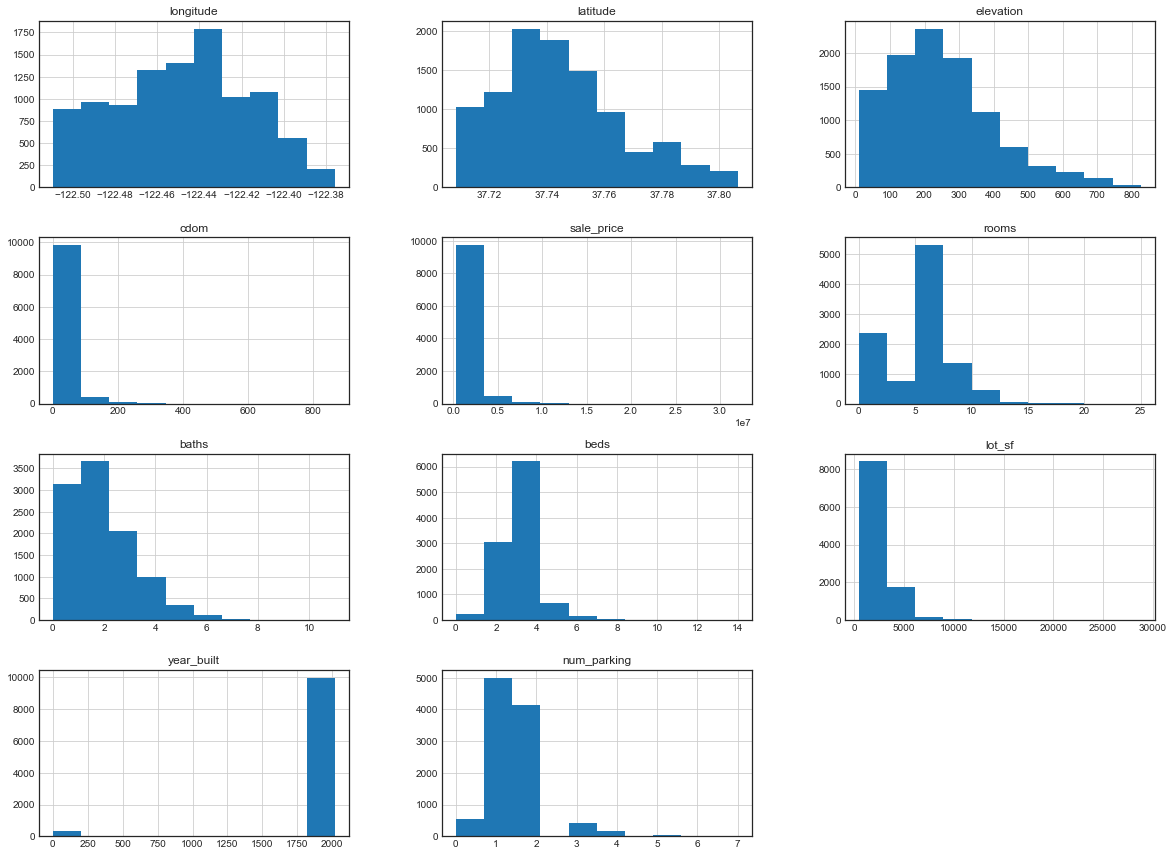

In [33]:
df.hist(figsize=(20,15))
plt.show()

In [34]:
# year build seems have some obnormal values like 0
df[df['year_built'] == df['year_built'].min()]

,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
50,-122.50831,37.763880,32.26,2 - Outer Sunset,9/11/2013,37,11/13/2013,685000,0,2.00,3,1438,0,1
115,-122.50775,37.755940,27.24,2 - Outer Sunset,6/26/2014,15,7/18/2014,1035000,0,3.00,5,2996,0,2
148,-122.50744,37.751217,25.46,2 - Outer Sunset,3/28/2014,14,5/15/2014,715000,0,1.00,2,1100,0,1
191,-122.50715,37.778020,240.02,1 - Outer Richmond,12/3/2015,25,1/12/2016,665000,5,1.00,2,644,0,0
255,-122.50672,37.772010,55.59,1 - Outer Richmond,11/23/2018,0,11/30/2018,1035000,0,1.00,2,2996,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23591,NaN,NaN,NaN,6 - Lower Pacific Height,9/27/2013,73,12/11/2013,1488000,0,4.50,4,2101,0,0
23640,NaN,NaN,NaN,5 - Cole Valley/Parnassu,9/22/2014,2,9/24/2014,1550000,0,1.00,1,2988,0,2
23663,NaN,NaN,NaN,4 - Monterey Heights,6/19/2015,0,6/19/2015,1607000,0,1.25,3,4875,0,2
23686,NaN,NaN,NaN,4 - Forest Hill Extensio,4/3/2015,18,5/22/2015,1386000,0,2.00,3,3158,0,2


In [35]:
# fill 0 year_built with its mean value
year_built_median = df['year_built'].median()
for index, row in df.iterrows():
    if row['year_built'] == 0:
        df.at[index, 'year_built'] = year_built_median

<AxesSubplot:>

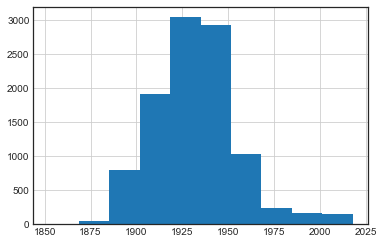

In [36]:
df['year_built'].hist()

In [37]:
df.describe()

,longitude,latitude,elevation,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
count,10146.000000,10146.000000,10146.000000,10328.000000,1.032800e+04,10328.000000,10328.000000,10328.000000,10328.000000,10328.000000,10328.000000
mean,-122.448419,37.744763,251.017809,28.567002,1.639099e+06,4.995643,2.120764,3.051704,2859.031565,1932.176995,1.502711
std,0.031501,0.021612,150.848883,34.203113,1.318402e+06,3.202395,1.085390,1.049395,1124.487239,22.512173,0.786243
min,-122.509290,37.708320,10.090000,0.000000,2.720700e+05,0.000000,0.000000,0.000000,459.000000,1852.000000,0.000000
25%,-122.471638,37.729646,142.042500,12.000000,9.500000e+05,4.000000,1.000000,2.000000,2374.000000,1916.000000,1.000000
50%,-122.446067,37.741743,229.775000,17.000000,1.310000e+06,5.000000,2.000000,3.000000,2651.000000,1928.000000,1.000000
75%,-122.426222,37.757060,331.585000,35.000000,1.838250e+06,7.000000,3.000000,4.000000,3014.000000,1946.000000,2.000000
max,-122.375885,37.806440,825.500000,867.000000,3.200000e+07,25.000000,11.000000,14.000000,28788.000000,2018.000000,7.000000


In [38]:
# Define house age and replace it with year_built
df['HouseAge'] = 2022 - df['year_built']
df.drop(['year_built'], axis=1, inplace= True)
df

<ipython-input-38-645bcfd1cb92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HouseAge'] = 2022 - df['year_built']
/Users/zilinchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,longitude,latitude,elevation,subdist_desc,on_market_date,cdom,sale_date,sale_price,rooms,baths,beds,lot_sf,num_parking,HouseAge
1,-122.50929,37.762608,23.21,2 - Outer Sunset,12/3/2015,144,4/25/2016,1075000,9,3.0,4,3000,1,75
2,-122.50929,37.762608,23.21,2 - Outer Sunset,5/18/2017,36,8/17/2017,1525000,9,5.0,5,3000,1,75
5,-122.50919,37.776695,175.89,1 - Outer Richmond,5/17/2018,13,6/21/2018,3310000,8,4.0,4,3959,3,71
7,-122.50909,37.759580,23.45,2 - Outer Sunset,7/6/2018,131,11/28/2018,1304000,0,2.0,3,2639,1,122
8,-122.50908,37.759480,23.57,2 - Outer Sunset,10/9/2015,24,12/16/2015,1303000,5,2.0,3,2996,1,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23698,NaN,NaN,NaN,10 - Bayview,4/28/2016,13,6/9/2016,750000,0,1.0,3,2495,1,98
23699,NaN,NaN,NaN,10 - Bayview,12/21/2015,0,12/21/2015,700000,6,1.5,3,2495,2,83
23700,NaN,NaN,NaN,9 - Potrero Hill,7/27/2018,13,10/31/2018,1100000,10,2.0,4,2500,0,94
23702,NaN,NaN,NaN,10 - Excelsior,4/21/2017,12,5/12/2017,935000,7,2.0,3,2495,1,74


In [39]:
# look at correlation matrix to get general idea
corr_matrix = df.corr()
corr_matrix

,longitude,latitude,elevation,cdom,sale_price,rooms,baths,beds,lot_sf,num_parking,HouseAge
longitude,1.000000,-0.273830,-0.126112,0.059154,-0.003025,-0.040807,-0.021432,-0.060697,-0.197180,-0.080986,0.052601
latitude,-0.273830,1.000000,-0.110265,-0.017188,0.531334,0.052975,0.294379,0.201329,0.042476,0.103326,0.246664
elevation,-0.126112,-0.110265,1.000000,-0.035645,0.043415,-0.041350,0.088715,0.060238,0.254126,0.065839,-0.168791
cdom,0.059154,-0.017188,-0.035645,1.000000,0.058478,0.050136,0.120662,0.118920,0.057674,0.005819,-0.030291
sale_price,-0.003025,0.531334,0.043415,0.058478,1.000000,0.058698,0.603004,0.451552,0.330975,0.251566,0.118256
...,...,...,...,...,...,...,...,...,...,...,...
baths,-0.021432,0.294379,0.088715,0.120662,0.603004,0.130448,1.000000,0.733690,0.284772,0.198346,-0.047123
beds,-0.060697,0.201329,0.060238,0.118920,0.451552,0.205717,0.733690,1.000000,0.285004,0.195122,-0.038577
lot_sf,-0.197180,0.042476,0.254126,0.057674,0.330975,0.094962,0.284772,0.285004,1.000000,0.292840,-0.001244
num_parking,-0.080986,0.103326,0.065839,0.005819,0.251566,0.057520,0.198346,0.195122,0.292840,1.000000,-0.163047


In [40]:
corr_matrix["sale_price"].sort_values(ascending=False)

sale_price    1.000000
baths         0.603004
latitude      0.531334
beds          0.451552
lot_sf        0.330975
                ...   
HouseAge      0.118256
rooms         0.058698
cdom          0.058478
elevation     0.043415
longitude    -0.003025
Name: sale_price, Length: 11, dtype: float64

### Some Feature Engineering

In [41]:
# Further drop unnecessary columns
# longtitude and latitude represent location, but less relavant than subdistrict number
# cdom, cumulative days on market, is equal to sale date less date on market
df.drop(['longitude', 'latitude', 'elevation', 'on_market_date', 'sale_date'], axis=1, inplace=True)
df

/Users/zilinchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,subdist_desc,cdom,sale_price,rooms,baths,beds,lot_sf,num_parking,HouseAge
1,2 - Outer Sunset,144,1075000,9,3.0,4,3000,1,75
2,2 - Outer Sunset,36,1525000,9,5.0,5,3000,1,75
5,1 - Outer Richmond,13,3310000,8,4.0,4,3959,3,71
7,2 - Outer Sunset,131,1304000,0,2.0,3,2639,1,122
8,2 - Outer Sunset,24,1303000,5,2.0,3,2996,1,122
...,...,...,...,...,...,...,...,...,...
23698,10 - Bayview,13,750000,0,1.0,3,2495,1,98
23699,10 - Bayview,0,700000,6,1.5,3,2495,2,83
23700,9 - Potrero Hill,13,1100000,10,2.0,4,2500,0,94
23702,10 - Excelsior,12,935000,7,2.0,3,2495,1,74


In [42]:
# extract feature from subdist_desc, i.e. extracting subdistrict_no
df['subdist_desc'] = df['subdist_desc'].apply(lambda x: x.split('-')[0])
df

<ipython-input-42-07fd89cad3ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subdist_desc'] = df['subdist_desc'].apply(lambda x: x.split('-')[0])


,subdist_desc,cdom,sale_price,rooms,baths,beds,lot_sf,num_parking,HouseAge
1,2,144,1075000,9,3.0,4,3000,1,75
2,2,36,1525000,9,5.0,5,3000,1,75
5,1,13,3310000,8,4.0,4,3959,3,71
7,2,131,1304000,0,2.0,3,2639,1,122
8,2,24,1303000,5,2.0,3,2996,1,122
...,...,...,...,...,...,...,...,...,...
23698,10,13,750000,0,1.0,3,2495,1,98
23699,10,0,700000,6,1.5,3,2495,2,83
23700,9,13,1100000,10,2.0,4,2500,0,94
23702,10,12,935000,7,2.0,3,2495,1,74


In [43]:
from sklearn.preprocessing import  OneHotEncoder

In [52]:
old_cat = df[['subdist_desc']]
enc = OneHotEncoder(sparse=False)
subdist_cat = enc.fit_transform(old_cat)
subdist_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [53]:
enc.categories_

[array(['1 ', '10 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 '],
       dtype=object)]

In [58]:
# drop the old column and concat the new cat data to the dataframe
# df.drop(['subdist_desc'], axis=1, inplace=True)
# fulldata = np.c_[df.values, subdist_cat]
fulldata.shape

(10328, 18)

In [63]:
df.values

array([[1.440000e+02, 1.075000e+06, 9.000000e+00, ..., 3.000000e+03,
        1.000000e+00, 7.500000e+01],
       [3.600000e+01, 1.525000e+06, 9.000000e+00, ..., 3.000000e+03,
        1.000000e+00, 7.500000e+01],
       [1.300000e+01, 3.310000e+06, 8.000000e+00, ..., 3.959000e+03,
        3.000000e+00, 7.100000e+01],
       ...,
       [1.300000e+01, 1.100000e+06, 1.000000e+01, ..., 2.500000e+03,
        0.000000e+00, 9.400000e+01],
       [1.200000e+01, 9.350000e+05, 7.000000e+00, ..., 2.495000e+03,
        1.000000e+00, 7.400000e+01],
       [7.800000e+01, 1.239988e+06, 7.000000e+00, ..., 1.980000e+03,
        0.000000e+00, 1.170000e+02]])

### ML and Train

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_set, test_set = train_test_split(fulldata, test_size=0.2, random_state=42)


array([[3.70e+01, 6.80e+05, 4.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.08e+02, 4.50e+06, 0.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [1.80e+01, 8.25e+05, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [1.20e+01, 8.39e+05, 8.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [8.00e+00, 9.25e+05, 7.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [4.00e+00, 1.45e+06, 4.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [64]:
# set train target and train features from train set
train_target = train_set[:, 1]
train_target = train_target.reshape(len(train_target), -1)
train_target

array([[ 680000.],
       [4500000.],
       [ 825000.],
       ...,
       [ 839000.],
       [ 925000.],
       [1450000.]])

In [67]:
train_features = np.c_[train_set[:,0], train_set[:, 2:]]
train_features

array([[ 37. ,   4. ,   1. , ...,   0. ,   0. ,   0. ],
       [108. ,   0. ,   4.5, ...,   0. ,   1. ,   0. ],
       [ 18. ,   0. ,   2. , ...,   0. ,   0. ,   0. ],
       ...,
       [ 12. ,   8. ,   2.5, ...,   0. ,   0. ,   0. ],
       [  8. ,   7. ,   1. , ...,   0. ,   0. ,   0. ],
       [  4. ,   4. ,   2. , ...,   0. ,   0. ,   0. ]])

In [69]:
# set test_target test_features from test_set
test_target = test_set[:, 1]
test_target = test_target.reshape(len(test_set), -1)
test_target

array([[ 762000.],
       [1150000.],
       [2700000.],
       ...,
       [ 940000.],
       [1600000.],
       [ 540000.]])

In [70]:
test_features = np.c_[test_set[:,0], test_set[:, 2:]]

(2066, 17)

In [71]:
test_target.shape, test_features.shape

((2066, 1), (2066, 17))

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression()
lr.fit(train_features, train_target)

LinearRegression()

In [74]:
lr.coef_

array([[-1.76980915e+02, -1.10506793e+04,  4.09440297e+05,
         3.61644102e+04,  2.44788336e+02,  1.19057740e+05,
         1.43382332e+03, -2.78834956e+05, -9.86845309e+05,
        -7.18691874e+05, -9.76977373e+05, -8.41548408e+05,
         1.30073975e+05,  2.06628343e+05,  2.45438554e+06,
         1.35260070e+06, -3.40790644e+05]])

In [75]:
lr.intercept_

array([196346.53060139])

In [76]:
from sklearn.metrics import mean_squared_error

In [78]:
# evaluate performance
train_predict = lr.predict(train_features)
train_mse = mean_squared_error(train_target, train_predict)
train_sqrtmse = np.sqrt(train_mse)
train_sqrtmse

795366.9627057618

In [79]:
test_predict = lr.predict(test_features)
test_mse = mean_squared_error(test_target, test_predict)
test_sqrt_mse = np.sqrt(test_mse)
test_sqrt_mse

652477.8550504954